In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up

### Extracting the data
##### Utilizing Yahoo finance's API to get the relevant that we need

In [2]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statenebt that the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one wants to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [3]:
# creating a list of the ticker names of the stocks we want to use for our portfolio. This will help us in downloading the data from the yf alius library that was declared as well for creating the ticker column in our pandas dataframe
stock_pick = ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']
etf_pick = ['SPY', 'IWM', 'DIA']

# this will download all of the relevant data related to our constituent's of selected stocks and etfs
portfolio_individual = import_securities_data(stock_pick, 1, "y")
portfolio_etf = import_securities_data(etf_pick, 1, "y")

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [4]:
# visualizing the data to make sure all the data was imported correctly
portfolio_individual

Price        Adj Close                                               \
Ticker            AAPL        BND          F         JPM         KO   
Date                                                                  
2023-03-31  164.024475  71.467766  11.803081  126.691559  60.113270   
2023-04-03  165.287750  71.771507  11.878021  126.545731  60.471840   
2023-04-04  164.750626  72.062614  11.915492  124.854050  60.287716   
2023-04-05  162.890549  72.256691  11.643833  125.040222  60.859482   
2023-04-06  163.785767  72.237297  11.550159  124.903038  60.898243   
...                ...        ...        ...         ...        ...   
2024-03-22  172.279999  72.550003  12.910000  196.619995  60.490002   
2024-03-25  170.850006  72.410004  12.900000  194.820007  60.400002   
2024-03-26  169.710007  72.470001  12.440000  195.729996  60.540001   
2024-03-27  173.309998  72.720001  13.060000  199.520004  61.029999   
2024-03-28  171.479996  72.629997  13.280000  200.300003  61.180000   

Price                                   Close                    ...  \
Ticker            MSFT          O        AAPL        BND      F  ...   
Date                                                             ...   
2023-03-31  285.953094  59.887928  164.899994  73.830002  12.60  ...   
2023-04-03  284.891815  59.462322  166.169998  73.959999  12.68  ...   
2023-04-04  284.842224  59.433945  165.630005  74.260002  12.72  ...   
2023-04-05  282.025330  59.310989  163.759995  74.459999  12.43  ...   
2023-04-06  289.226257  59.178593  164.660004  74.440002  12.33  ...   
...                ...        ...         ...        ...    ...  ...   
2024-03-22  428.739990  51.831078  172.279999  72.550003  12.91  ...   
2024-03-25  422.859985  51.920643  170.850006  72.410004  12.90  ...   
2024-03-26  421.649994  52.348591  169.710007  72.470001  12.44  ...   
2024-03-27  421.429993  53.513000  173.309998  72.720001  13.06  ...   
2024-03-28  420.720001  54.099998  171.479996  72.629997  13.28  ...   

Price            Open                           Volume                     \
Ticker             KO        MSFT          O      AAPL      BND         F   
Date                                                                        
2023-03-31  62.060001  283.730011  62.520000  68749800  4549200  66868200   
2023-04-03  62.299999  286.519989  62.950001  56976200  5346200  55956300   
2023-04-04  62.389999  287.230011  62.830002  46278300  4126700  54655700   
2023-04-05  62.529999  285.850006  62.959999  51511700  4345900  53332900   
2023-04-06  62.860001  283.209991  62.970001  45390100  4381700  36355800   
...               ...         ...        ...       ...      ...       ...   
2024-03-22  60.520000  429.700012  52.770000  71106600  4169400  33125200   
2024-03-25  60.480000  425.239990  52.259998  54288300  7950500  39063500   
2024-03-26  60.500000  425.609985  52.380001  57388400  7603100  67140200   
2024-03-27  60.790001  424.440002  53.000000  60273300  7825200  53555800   
2024-03-28  61.139999  420.959991  53.619999  65672700  5326400  61846400   

Price                                              
Ticker           JPM        KO      MSFT        O  
Date                                               
2023-03-31  13105200  14440900  32766000  4142600  
2023-04-03  11775400  12300700  24883300  5758400  
2023-04-04  11579900  11433400  25824300  2832400  
2023-04-05   9614700  12789600  22064800  4001900  
2023-04-06   8760200   9644200  29770300  3177600  
...              ...       ...       ...      ...  
2024-03-22   8105800  11501400  17636500  5773200  
2024-03-25   8620000  13144700  18060500  6775300  
2024-03-26   5961500  13277400  16725600  6484800  
2024-03-27   8725800  12551200  16705000  9112000  
2024-03-28   8628300  13683500  21871200  6318200  

[250 rows x 42 columns]

In [5]:
# visualizing the data to make sure all the data was imported correctly
portfolio_etf

Price        Adj Close                               Close              \
Ticker             DIA         IWM         SPY         DIA         IWM   
Date                                                                     
2023-03-31  326.295288  175.982513  403.546204  332.619995  178.399994   
2023-04-03  329.522858  176.061417  405.083954  335.910004  178.479996   
2023-04-04  327.590210  172.973862  402.836456  333.940002  175.350006   
2023-04-05  328.453522  171.277161  401.781769  334.820007  173.630005   
2023-04-06  328.532013  171.533630  403.349030  334.899994  173.889999   
...                ...         ...         ...         ...         ...   
2024-03-22  394.529999  205.070007  521.210022  394.529999  205.070007   
2024-03-25  392.950012  205.539993  519.770020  392.950012  205.539993   
2024-03-26  392.850006  205.169998  518.809998  392.850006  205.169998   
2024-03-27  397.559998  209.639999  523.169983  397.559998  209.639999   
2024-03-28  397.760010  210.300003  523.070007  397.760010  210.300003   

Price                         High                                 Low  \
Ticker             SPY         DIA         IWM         SPY         DIA   
Date                                                                     
2023-03-31  409.390015  332.809998  178.639999  409.700012  329.510010   
2023-04-03  410.950012  336.250000  179.779999  411.369995  333.510010   
2023-04-04  408.670013  336.260010  179.100006  411.920013  332.630005   
2023-04-05  407.600006  335.450012  174.830002  408.700012  333.760010   
2023-04-06  409.190002  335.309998  174.460007  409.480011  333.279999   
...                ...         ...         ...         ...         ...   
2024-03-22  521.210022  398.059998  208.240005  522.609985  394.489990   
2024-03-25  519.770020  394.149994  207.009995  520.950012  392.820007   
2024-03-26  518.809998  394.269989  207.639999  521.580017  392.630005   
2024-03-27  523.169983  397.579987  209.710007  523.210022  394.470001   
2024-03-28  523.070007  398.559998  211.880005  524.609985  397.040009   

Price                                     Open                          \
Ticker             IWM         SPY         DIA         IWM         SPY   
Date                                                                     
2023-03-31  176.369995  404.549988  329.589996  176.399994  404.660004   
2023-04-03  176.490005  408.440002  333.589996  178.949997  408.850006   
2023-04-04  174.320007  407.239990  335.910004  178.919998  411.619995   
2023-04-05  172.529999  405.880005  334.000000  174.250000  407.910004   
2023-04-06  172.679993  405.679993  334.350006  173.720001  406.769989   
...                ...         ...         ...         ...         ...   
2024-03-22  205.070007  520.969971  397.760010  207.850006  522.109985   
2024-03-25  205.509995  519.609985  393.920013  205.720001  519.799988   
2024-03-26  204.990005  518.400024  393.679993  207.050003  521.229980   
2024-03-27  206.160004  519.489990  395.000000  206.800003  521.710022   
2024-03-28  209.839996  522.780029  398.059998  210.080002  523.210022   

Price        Volume                       
Ticker          DIA       IWM        SPY  
Date                                      
2023-03-31  2837300  39602900  112062600  
2023-04-03  3450700  27609000   67391100  
2023-04-04  2449900  33487200   66601500  
2023-04-05  2566600  28247300   65200200  
2023-04-06  2333300  26366300   63743300  
...             ...       ...        ...  
2024-03-22  3154100  28422000   79023000  
2024-03-25  2535600  20107800   48512100  
2024-03-26  3395400  23434800   65463700  
2024-03-27  4427300  35028400   82999800  
2024-03-28  3155000  37675100   96294900  

[250 rows x 18 columns]

In [6]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column nad putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

# Part 1

#### Creating Portfolio Pandas Dataframe

##### Ticker Column

In [7]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# here ticker is the title of our column and the list with the stock symbols is our values within our column that has the title ticker
stock_pick_dict = { 'ticker': ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']}

# creating the dataframe using pandas library
df = pd.DataFrame(stock_pick_dict)

# visualizing the dataframe
df

,ticker
0,AAPL
1,MSFT
2,F
3,O
4,BND
5,KO
6,JPM


 ##### Portfolio Weight (Equally Weighted) Column

In [8]:
# all assets that are being held in this portfolio are equal weighted. so we want to make sure of that by taking the total of a pie, 100%, and divide it by the count of stocks that we have within our portfolio
df['portfolio_weight'] = np.divide(1, df['ticker'].count()).round(4)

df

,ticker,portfolio_weight
0,AAPL,0.1429
1,MSFT,0.1429
2,F,0.1429
3,O,0.1429
4,BND,0.1429
5,KO,0.1429
6,JPM,0.1429


##### Annualized Volatility (Trailing 3 Month) Column

In [9]:
# filtering for data from three months ago using the pandas query function. credit to @https://stackoverflow.com/questions/59692194/pandas-filter-data-that-are-in-last-n-month-using-query

# creating a variable to get todays full date
now = pd.to_datetime('now')

# creating a variable that offsets today's date by 3 months
last_three_months = now - pd.DateOffset(months=3)

# leverging query dunction to filter for all of the data that is less than and equal to the offsetted data. This means that we've filtered for data between now and three months ago
portfolio_three_month_trail = portfolio_individual['Adj Close'].query('Date >= @last_three_months')

# visualizing data to check if the code is working correctly
portfolio_three_month_trail.tail()

Ticker,AAPL,BND,F,JPM,KO,MSFT,O
Date,,,,,,,
2024-03-22,172.279999,72.550003,12.91,196.619995,60.490002,428.739990,51.831078
2024-03-25,170.850006,72.410004,12.90,194.820007,60.400002,422.859985,51.920643
2024-03-26,169.710007,72.470001,12.44,195.729996,60.540001,421.649994,52.348591
2024-03-27,173.309998,72.720001,13.06,199.520004,61.029999,421.429993,53.513000
2024-03-28,171.479996,72.629997,13.28,200.300003,61.180000,420.720001,54.099998


In [10]:
# setting a definition method to calculate the annual volatility of the stock portfolio
def calc_annual_vol(portfolio):
    
    # calculating the percentage change to get the daily returns
    daily_returns_data = portfolio.pct_change()

    # getting the annualized volatility for each of the stocks. Credit to Yves Hilpisch the author for the python for finance V.2018 (pg.19)
    annualized_volatility_data = (daily_returns_data.std() * np.sqrt(252)).round(4)

    return annualized_volatility_data

In [11]:
# using definition method to import the three month trailing portfolio and calculate the annual volatility of the portfolio
annualized_volatility_data = calc_annual_vol(portfolio_three_month_trail)

# creating a column for annualized volatility and importing the data to the respective ticker using the import data definition function
import_data(df, annualized_volatility_data, 'annualized_volatility')

# checking original dataset to make sure all of the data was appended to the corresponding ticker
df


,ticker,portfolio_weight,annualized_volatility
0,AAPL,0.1429,0.1998
1,MSFT,0.1429,0.1916
2,F,0.1429,0.3376
3,O,0.1429,0.1742
4,BND,0.1429,0.0554
5,KO,0.1429,0.1118
6,JPM,0.1429,0.1350


##### Beta Againts ETFs (SPY, IWM, DIA) (Using Trailing 12-months) Columns

In [12]:
# creating a definition function to calculate beta. credit to: https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py look at the calculatebeta function
def beta_calc(stock_returns, market_returns):
    
    # calculating covariance of stock returns and market returns, using numpy's universal functions 
    covariance = np.cov(stock_returns, market_returns)

    # caluculating variance of market returns, using numpy's universal functions 
    variance = np.var(market_returns)
    
    # implementing the beta formula. here we are extracting the covariance of the stock market returns and market returns from the matrix that was created in the previous code with the covariance variable. we then take that covariance and divide it by the variance formula and return the value of that formula as the result of using the definition function
    return covariance[0,1] / variance

In [13]:
# calculating portfolio's stocks returns
stock_adjclose_returns = portfolio_individual['Adj Close'].pct_change()

# calculating etf returns
etf_adjclose_returns = portfolio_etf['Adj Close'].pct_change()

# reseting the index so that it doesnt cause problems when trying to iterate through the dataset
stock_adjclose_returns.reset_index(inplace= True)
etf_adjclose_returns.reset_index(inplace= True)

In [14]:
# the logic of this for loop is to grab an etf and then get all stocks on our portfolio along with the returns data to calculate the beta of all of the stocks against that one selected etf. then after it is done calculating the beta for each of the stocks against that one etf, it goes back and pulls another etf and starts calculating the beta for each of the stocks against the new selected etf

# looping through etf returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed etf and etf data holds the data related to the returns values
for etf_ticker, etf_data in etf_adjclose_returns.iloc[1:,1:].items():
    
    # this a counter variable, set up so that the for loop that is below can loop the same amount of times as the count of stocks that we have on our portfolio, which is 7. so we want the for loop to loop 7 times so that we can loop through all of the stock tickers
    counter = 0

    # looping through stock returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed stock and stock data holds the data related to the stock's returns values. the iloc ignores the first row containing nan values and skips the first column which contains date related data. item method seperates the data into index and series data, for example apple as the index and the returns as the series of the index
    for stock_ticker, stock_data in stock_adjclose_returns.iloc[1:,1:].items():
        
        # this is variable set up to calculate the beta of a stock returns against the returns of an etf. In this case we have grabbed one etf and we are looping through the list of stock symbols and extracting their respective returns data and applying the beta calculator method that we have created 
        beta = beta_calc(stock_data, etf_data)

        # takes the ticker that was selected from the for loop and finds the respective ticker's row in the original dataframe, named under the variable 'df'. Then, it creates a new column or finds the respective column and inputs the value respective to the row that the ticker matched on the original dataframe 
        df.loc[df['ticker'] == stock_ticker, f'Beta against {etf_ticker}'] = beta

        # this adds a 1 to the counter variable every time the for loop loop's through the set of instructions
        counter += 1

        # the purpose of this if statement is to renew counter to 0 if it equals the count of stocks that we have picked for our portfolio under our variable that contains the list of the stock symbls we have chosen. we do this because we want to only loop throughout the for loop only for the amount of stocks that we have in our portfolio
        if counter == len(stock_pick): 
            
            # if we have reached the count of ticker symbols in our portfolio, then we reset our counter by making it equal to 0 for the next for loop to happen
            counter = 0

            # lastly we set a break in order to get out of the loop and go back all the way back to the for loop with the etf data in order to grab the next etf that we want to compare our stocks against as our market
            break
            

In [15]:
# viewing the data to make sure all of the data was appended to the correct stock ticker
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043
2,F,0.1429,0.3376,1.635281,0.922247,1.264458
3,O,0.1429,0.1742,0.871306,0.487987,0.633271
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786


##### Weekly Drawdrowns (Average and Maximum) Columns

In [16]:
# we need more than one year worth for weekly daily drawdowns. this is because we are rolling on a 5 day window and so if we start on the first date of the data frame we aregoing to need five days worth of data before that date starts. we also need one year worth of weekly drawdowns.
drawdown_port_indiv = import_securities_data(stock_pick, 2, 'y')

# Retrieving the adjusted closing price
drawdown_port_indiv = drawdown_port_indiv['Adj Close'].pct_change()

[*********************100%%**********************]  7 of 7 completed


In [17]:
# we are setting a window of 5 since a trading week consists of 5 days (Monday - Firday). This variable will be used to apply the rolling method. this way we can get the weekly drawdown for each day.
window = 5

# using the drawdown formula -->  (week low price - week high price) diveded by week high price --- and then taking the mean of each to get the average weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filter for the last previous day by using iloc and find the average weekly drawdown of from those 20 days of weekly drawdown data
Average_Weekly_Drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].mean()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, Average_Weekly_Drawdown, 'average_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413,0.350105
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043,-0.697542
2,F,0.1429,0.3376,1.635281,0.922247,1.264458,-2.324628
3,O,0.1429,0.1742,0.871306,0.487987,0.633271,-1.857292
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136,-0.750909
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115,-2.232476
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786,-1.890466


In [18]:
# using the drawdown formula --> (week low price - week high price) divided by week high price --- and then taking the max of each variable within the formila  to get the maximum weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filter for the previous 20 days of weekly drawdown data and find the maximum day that had the highest weekly drawdown. we need to use the min function here because we are trying to find the maximum drawdown, drawdowns is the biggest decline of stock within a time period. In this case all of our returns are negative and we are trying to find out what is the maximum number that our stock can fall
maximum_weekly_drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].min()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, maximum_weekly_drawdown, 'maximum_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413,0.350105,-4.127936
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043,-0.697542,-3.111615
2,F,0.1429,0.3376,1.635281,0.922247,1.264458,-2.324628,-8.648186
3,O,0.1429,0.1742,0.871306,0.487987,0.633271,-1.857292,-2.267976
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136,-0.750909,-7.168311
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115,-2.232476,-9.209638
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786,-1.890466,-3.164477


##### Total Returns Columns

In [19]:
# creating a variable to store the stock data that has historical data dating from 10 years ago
portfolio_individual_10y = import_securities_data(stock_pick, 10, 'y')

# viewing data
portfolio_individual_10y.head()



[*********************100%%**********************]  7 of 7 completed

Price       Adj Close                                                        \
Ticker           AAPL        BND         F        JPM         KO       MSFT   
Date                                                                          
2014-04-02  17.067375  61.899075  9.986881  46.053520  27.903193  35.015385   
2014-04-03  16.949089  61.952736  9.944408  46.190586  27.713928  34.727463   
2014-04-04  16.729832  62.136707  9.786658  45.543346  27.823116  33.762108   
2014-04-07  16.467154  62.251713  9.671381  44.926556  28.114307  33.702827   
2014-04-08  16.466217  62.297661  9.768456  44.812336  28.318134  33.719769   

Price                      Close                        ...       Open  \
Ticker              O       AAPL        BND          F  ...         KO   
Date                                                    ...              
2014-04-02  25.101496  19.376785  80.750000  16.459999  ...  38.490002   
2014-04-03  24.910345  19.242500  80.820000  16.389999  ...  38.389999   
2014-04-04  25.119984  18.993570  81.059998  16.129999  ...  38.240002   
2014-04-07  25.594749  18.695356  81.209999  15.940000  ...  38.270000   
2014-04-08  25.847567  18.694286  81.269997  16.100000  ...  38.669998   

Price                                Volume                               \
Ticker           MSFT          O       AAPL      BND         F       JPM   
Date                                                                       
2014-04-02  41.439999  39.244186  180420800  3058800  39927100  14012200   
2014-04-03  41.290001  39.428295  162344000  1978900  26108300  11925200   
2014-04-04  41.250000  39.321705  275251200   936500  30524900  16966900   
2014-04-07  39.959999  39.467052  289850400  1099400  28112900  18685700   
2014-04-08  39.750000  39.825581  243888400   674200  26836400  16956500   

Price                                    
Ticker            KO      MSFT        O  
Date                                     
2014-04-02  15709100  28666700  2661425  
2014-04-03  18114000  30139600  1807961  
2014-04-04  15453600  51409600  2537791  
2014-04-07  17295700  37559600  3693425  
2014-04-08  14769900  35918600  2974224  

[5 rows x 42 columns]

In [20]:
# utilizing the total returns formula --> (ending value (with dividends) - beginning value) / beginning value -- here i utilized loc to identify the last dates for the adjusted close prices as our ending value and first dates for the open prices as our beginning value (assuming that the beggining of our investement was when the market opened, as orders for stocks start to get fulfilled when market opens). I then round the calculated number to three decimal places for better visibility and relavancy of the data
total_returns = (((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) * 100).round(3)

# viewing data
total_returns


Ticker
AAPL    785.254
BND     -10.167
F       -18.277
JPM     231.787
KO       58.950
MSFT    915.251
O        37.855
dtype: float64

In [21]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, total_returns, 'total_returns')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413,0.350105,-4.127936,785.254
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043,-0.697542,-3.111615,915.251
2,F,0.1429,0.3376,1.635281,0.922247,1.264458,-2.324628,-8.648186,-18.277
3,O,0.1429,0.1742,0.871306,0.487987,0.633271,-1.857292,-2.267976,37.855
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136,-0.750909,-7.168311,-10.167
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115,-2.232476,-9.209638,58.950
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786,-1.890466,-3.164477,231.787


##### Annualized Total Return

In [22]:
# utilizing the annualized total returns formula --> ((1+(ending value (with dividends) - beginning value) / beginning value) ^ (1/n))-1 -- here I used the same returns formula to calculate the returns. to the returns I then add 1 to calculate the overall returns. then I take one tenth of root of the overall total returns to annualize the data based on 10 years worth of data. I then subtract one from the left over number to get the annual return rate instead of the total growth over the period
annualized_ret = ((((1 + ((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open'] )) ** (1/10)) - 1) * 100).round(3)

# viewing the data
annualized_ret

Ticker
AAPL    24.367
BND     -1.066
F       -1.998
JPM     12.742
KO       4.743
MSFT    26.083
O        3.262
dtype: float64

In [23]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, annualized_ret, 'annualized_total_return')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413,0.350105,-4.127936,785.254,24.367
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043,-0.697542,-3.111615,915.251,26.083
2,F,0.1429,0.3376,1.635281,0.922247,1.264458,-2.324628,-8.648186,-18.277,-1.998
3,O,0.1429,0.1742,0.871306,0.487987,0.633271,-1.857292,-2.267976,37.855,3.262
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136,-0.750909,-7.168311,-10.167,-1.066
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115,-2.232476,-9.209638,58.950,4.743
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786,-1.890466,-3.164477,231.787,12.742


##### Part 1 Complete: Results

In [24]:
# lets see our pandas dataframe final results!!
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1998,0.925947,0.321958,1.072413,0.350105,-4.127936,785.254,24.367
1,MSFT,0.1429,0.1916,0.928068,0.220847,1.194043,-0.697542,-3.111615,915.251,26.083
2,F,0.1429,0.3376,1.635281,0.922247,1.264458,-2.324628,-8.648186,-18.277,-1.998
3,O,0.1429,0.1742,0.871306,0.487987,0.633271,-1.857292,-2.267976,37.855,3.262
4,BND,0.1429,0.0554,0.130793,0.094841,0.128136,-0.750909,-7.168311,-10.167,-1.066
5,KO,0.1429,0.1118,0.552822,0.127983,0.355115,-2.232476,-9.209638,58.950,4.743
6,JPM,0.1429,0.1350,1.033510,0.430733,0.745786,-1.890466,-3.164477,231.787,12.742


# Part 2

#### Create a table Showing Portfolio Risk Against The Three ETFs

##### Ticker Column

In [25]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# we can maybe automate this portion by creating a definition. or maybe even put it under class where we can include the import_data definition under the class as well

etf_pick_dict = { 'ticker': etf_pick}

# creating the pandas dataframe
df2 = pd.DataFrame(etf_pick_dict)

#visualizing the dataframe
df2

,ticker
0,SPY
1,IWM
2,DIA


##### Portfolio Correlation Against ETF Column

In [26]:
# getting each of the stocks daily returns with respect to their weighting in our portfolio
annual_ret_portfolio_individual = portfolio_individual['Adj Close'].pct_change().dropna() * np.divide(1, df['ticker'].count()).round(4)

# summing all of the stock daily returns horizontally and creating a new column to store the portfolio total returns for that date. Hence, we get the column stating the daily returns of our entire portfolio
annual_ret_portfolio_individual['port_ret_daily'] = annual_ret_portfolio_individual.sum(axis=1)

# getting the daily returns data for each of ETFs as they are going to act as our market benchmark
annual_ret_portfolio_etf = portfolio_etf['Adj Close'].pct_change().dropna()


In [27]:
# creating a definition method to calculate the correlation of our portfolio returns against the etfs returns
def calc_port_corr(equity_port_ret_data, etf_ret_data, portfolio):

    # dictionary with a Ticker and 0 column to store values under them. we do this so that it can work with the import_data method when we call it to append the data to our destination dataframe
    etf_corr_data = {
                'Ticker': [],
                 0: [] 
                 }
    
    # create a for loop that reads the column names that contains the names of our etfs in the dataframe
    for etf in etf_ret_data.columns:

        # take the returns of our portfolio and the returns of the looped etf and apply the correlation method in python to calculate correlation. we then append the result of that calculation to the 0 column in our etf_corr_data dictionary to store the value
        etf_corr_data[0].append(equity_port_ret_data[portfolio].corr(etf_ret_data[etf]))

        # this appends the current etf ticker that we are looping to  the Ticker column in our etf_corr_data dictionary
        etf_corr_data['Ticker'].append(etf)
    
    # the etf_corr_data dictionary is returned with all of the data that we've appended to the respective column using the for loop. to later be used in the import_data method
    return etf_corr_data

In [28]:
# utilizing the calc_port_corr method to calculate the correlation of etf against tour portfolio returns
corr = calc_port_corr(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [29]:
corr

{'Ticker': ['DIA', 'IWM', 'SPY'],
 0: [0.7943179376197418, 0.6776555495005533, 0.8157986759234582]}

In [30]:
# importing the data into the destination dataframe named df2 using the import data method that was created
import_data(df2, corr, 'Correlation Against ETF')

# visualizing the table
df2

,ticker,Correlation Against ETF
0,SPY,0.815799
1,IWM,0.677656
2,DIA,0.794318


##### Covariance of Portfolio Against ETF

In [31]:
# creating method to calculate the covariance of the portfolio returns against the etfs returns
def calc_cov(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary needed to append calculated data from the for loop and used later for import_data method
    covariance_data = {
        'Ticker': [],
            0: [] 
            }
    
    # looping through the column names to get the names of the etfs one by one and passing them through the set of instruuctions that does gets the respective returns data and makes the calculations
    for etf in etf_ret_data.columns:

        # utilizing the covariance universal function from numpy to calculate the covaraince of the portfolio returns against the etf returns
        covariance_matrix = np.cov(equity_port_ret_data[portfolio], etf_ret_data[etf])

        # this appends the current etf ticker that we are looping to the Ticker column in our covariance_data dictionary
        covariance_data['Ticker'].append(etf)

        # appending the correlation values to the 0 column in the covariance_data dictionary
        covariance_data[0].append(covariance_matrix[0, 1])

    # returning the covariance data dictionary for later usage in our code when trying to import to our original dataframe
    return covariance_data

In [32]:
# utilizing the calc_cov method to calculate the covariance of our portfolio returns against each of the etfs
cov_data = calc_cov(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [33]:
# importing the covariance data that was calculated into the original dataframe
import_data(df2, cov_data, 'Covariance of Portfolio vs ETF')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF
0,SPY,0.815799,0.000040
1,IWM,0.677656,0.000057
2,DIA,0.794318,0.000034


##### Tracking Errors (Using Trailing 10-years) Column

In [34]:
# credit to https://www.youtube.com/watch?v=0oU5dfzo040, and Alex Guerrero https://github.com/CCNY-Analytics-and-Quant/Portfolio-analysis-2/blob/main/Portfolio_Analysis.ipynb
def calc_track_err(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary to store our calculated values from the for loop
    track_err_data = {
        'Ticker': [],
            0: [] 
            }
    
    for etf in etf_ret_data.columns:
        
        # calculating the difference between the portfolio returns and the etf return
        port_bench_ret_diff = equity_port_ret_data[portfolio] - etf_ret_data[etf]
        
        # taking the etf ticker that has been looped and appending it to the ticker column in the track_err_data dictionary
        track_err_data['Ticker'].append(etf)

        # getting the standard deviation of the difference between the portfolio returns and etf returns and appending it to the 0 column in the track_err_data column
        track_err_data[0].append(port_bench_ret_diff.std())

    return track_err_data

In [35]:
# importing 10 years woth of historical data for the selected stocks and etfs
portfolio_equity_10y = import_securities_data(stock_pick, 10, 'y')
portfolio_etf_10y = import_securities_data(etf_pick, 10, 'y')

# getting the daily returns of each stock and then summing them up horizontally to get the portfolio daily returns
decade_trail_ret_portfolio_equity = portfolio_equity_10y['Adj Close'].pct_change().dropna()* np.divide(1, df['ticker'].count()).round(4)
decade_trail_ret_portfolio_equity['port_ret_daily'] = decade_trail_ret_portfolio_equity.sum(axis=1)

# getting the etfs daily returns
decade_trail_ret_portfolio_etf = portfolio_etf_10y['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  7 of 7 completed


[*********************100%%**********************]  3 of 3 completed


In [36]:
# using the created method to calculate the tracking error and inputting the relevant data
TE = calc_track_err(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# using the import data method to import the data into the dataframe
import_data(df2, TE,'Tracking Errors')

# visualizing the dataframe
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors
0,SPY,0.815799,0.000040,0.004262
1,IWM,0.677656,0.000057,0.008040
2,DIA,0.794318,0.000034,0.004493


##### Sharpe-Ratio (Using Current Risk-Free Rate) Column

In [37]:
# creating a method to calculate the sharpe ratio. sharpe ratio code partial credit: https://www.youtube.com/watch?v=s0bxoD_0fAU

def calc_sharpe_ratio(etf_ret_data):

    sharpe_ratio_data = {
        'Ticker': [],
            0: [] 
            }
    
    # creating web-scraper to get current risk-free rate from the web. we use the 10-year treasury yield rate for this from Yahoo Finance. credit: https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1s
    # getting necessary libraries
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 10-year treasury risk free rate
    risk_free_rate_10yr = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number
    risk_free_rate_10yr = float(risk_free_rate_10yr.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe
    daily_risk_free_rate = ((1 + (risk_free_rate_10yr/100)) ** (1/252)) -1
    
    
    for etf in etf_ret_data.columns:

        # calculate excess returns by subtracting the risk-free rate
        excess_returns = etf_ret_data[etf] - daily_risk_free_rate

        # calculate the average excess return
        average_excess_return = np.mean(excess_returns)
        
        # calculate the standard deviation of excess returns
        std_excess_return = np.std(excess_returns)
        
        # append the ticker to the Ticker column in our sharpe ratio data dictionary
        sharpe_ratio_data['Ticker'].append(etf)
        
        # calculate the Sharpe Ratio and append to the 0 column in our sharpe ratio data dictionary
        sharpe_ratio_data[0].append(average_excess_return / std_excess_return)
    
    return sharpe_ratio_data

In [38]:
# using the calc_sharpe_ratio method to calculate our sharpe ratio for each of our etf
sharpe_ratios = calc_sharpe_ratio(decade_trail_ret_portfolio_etf)

# importing the data into our dataframe
import_data(df2, sharpe_ratios, 'Sharpe Ratio')

# visualizing
df2

ValueError: could not convert string to float: 'N/A'

##### Annual Volatility (252 days) Spread Column

In [ ]:
# creating a method to calculate the annual volatility spread
def calc_annual_vol_spread(equity_port_ret_data, etf_ret_data, portfolio):

    annual_vol_spread_data = {
        'Ticker': [],
        0: [] 
        }

    for etf in etf_ret_data.columns:

        # getting the standard deviation of our etf daily returns
        etf_vol = etf_ret_data[etf].std()

        # getting the standard deviation of our equity portfolio daily returns
        port_vol = equity_port_ret_data[portfolio].std()

        # appending the etf ticker to the Ticker column in the dictionary
        annual_vol_spread_data['Ticker'].append(etf)

        # calculating the annualized volatility spread and appending it to the 0 column in the dictionary
        annual_vol_spread_data[0].append(((port_vol - etf_vol) * np.sqrt(252)))
    
    return annual_vol_spread_data

In [ ]:
# calculating the annual volatility spread of portfolio reutrns against the etfs returns using the method that was created
spread_data = calc_annual_vol_spread(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# importing the data into the original data frame
import_data(df2, spread_data, 'Annualized Volatility Spread')

# visualizing the current data frame
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Annualized Volatility Spread
0,SPY,0.831673,0.000043,0.004258,-0.008325
1,IWM,0.693584,0.000061,0.008039,-0.055157
2,DIA,0.803493,0.000036,0.004487,-0.006918


##### Part 2 Complete: Results

In [ ]:
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.831674,0.000043,0.004258,0.030102,-0.008324
1,IWM,0.693584,0.000061,0.008039,0.012090,-0.055157
2,DIA,0.803494,0.000036,0.004487,0.026342,-0.006918


# Part 3

##### creating covariance matrix chart

In [ ]:
# importing all of the securities data trailing 1 year
corr_matrix_data = import_securities_data(stock_pick + etf_pick, 1, 'y')

# calculating the correlation matrix using corr method and specifying that we want the correlation to follow pearson correlation method
corr_matrix_data = corr_matrix_data['Adj Close'].corr(method = 'pearson')

# visualizing datafrane
corr_matrix_data

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,BND,DIA,F,IWM,JPM,KO,MSFT,O,SPY
Ticker,,,,,,,,,,
AAPL,1.000000,0.181722,0.591348,0.258830,0.605531,0.578084,-0.033033,0.704406,-0.053372,0.663577
BND,0.181722,1.000000,0.558439,0.194127,0.613452,0.434686,0.709376,0.343121,0.602670,0.424325
DIA,0.591348,0.558439,1.000000,0.105441,0.871033,0.973750,0.160869,0.905625,-0.143811,0.972843
F,0.258830,0.194127,0.105441,1.000000,0.457445,0.121090,0.265756,0.024491,0.391122,0.188608
IWM,0.605531,0.613452,0.871033,0.457445,1.000000,0.854383,0.318001,0.711207,0.168690,0.872818
JPM,0.578084,0.434686,0.973750,0.121090,0.854383,1.000000,0.051841,0.906775,-0.238909,0.975702
KO,-0.033033,0.709376,0.160869,0.265756,0.318001,0.051841,1.000000,-0.061899,0.791091,0.046407
MSFT,0.704406,0.343121,0.905625,0.024491,0.711207,0.906775,-0.061899,1.000000,-0.345899,0.941365
O,-0.053372,0.602670,-0.143811,0.391122,0.168690,-0.238909,0.791091,-0.345899,1.000000,-0.240069


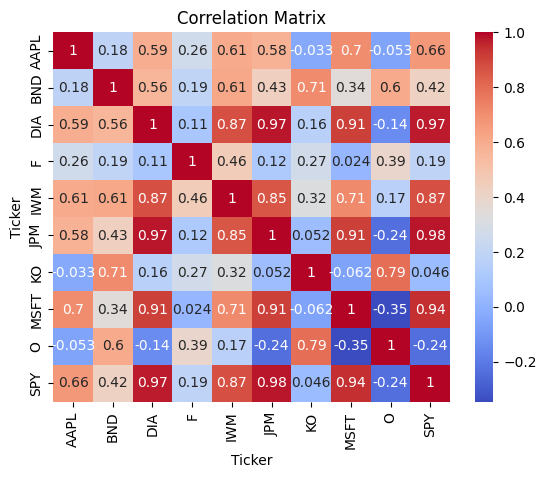

In [ ]:
# plotting the correlation method in a Heatmap. credit to Alex Guerrero
sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()